In [31]:
#########################steps belowonly for testing reason ###############################
# Sampling function
def sampleFile(sample_size,df):
    df_new = df.sample(frac = (sample_size/100))
    return df_new

df = sampleFile(10,df)

In [163]:
#importing libraries 
import pandas as pd 
import numpy as np
import geopandas as gpd
from haversine import haversine, Unit
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from folium import folium, Marker

#show all columns 
pd.set_option('display.max_columns', None)

In [164]:
#read in cleaned dataframe
df = pd.read_parquet("../data/df_cleaned_18_06_2021.parquet")

In [165]:
#adding columns function
def adding_column(df,keyword = None):
    if keyword == "distance city":
        df['PU_DISTANCE_CITY'] = df.apply(
        lambda row: haversine((row["Pickup Centroid Latitude"], row["Pickup Centroid Longitude"]), (41.85003, -87.65005), Unit.KILOMETERS), axis=1)
        df['DO_DISTANCE_CITY'] = df.apply(
        lambda row: haversine((row["Dropoff Centroid Latitude"], row["Dropoff Centroid Longitude"]), (41.85003, -87.65005), Unit.KILOMETERS), axis=1)
        return df
    if keyword == "dur":
        df["DURATION_IN_MINUTES"] = df["Trip Seconds"]/60
        df['DURATION_IN_MINUTES'] = df['DURATION_IN_MINUTES'].round(2)
        return df
    else: 
        print("No option selected!")

    


In [166]:
#adding 
#df = distance_to(df,"distance city")
df = adding_column(df,"dur")

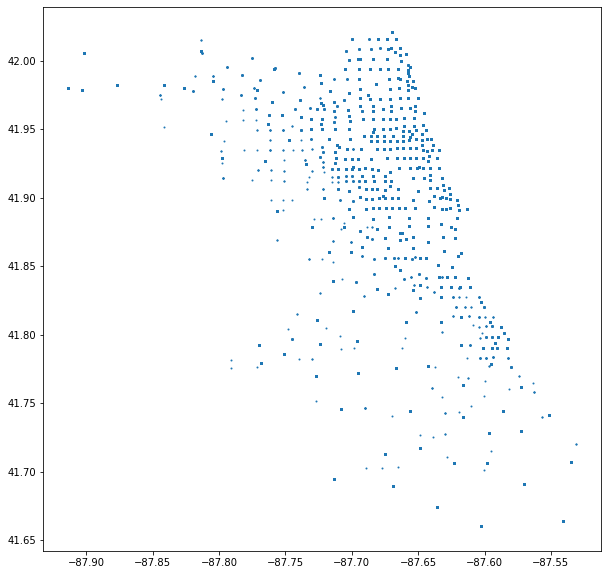

In [167]:
#plot rides
longitude = list(df["Pickup Centroid Longitude"]) + list(df["Dropoff Centroid Longitude"])
latitude = list(df["Pickup Centroid Latitude"]) + list(df["Dropoff Centroid Latitude"])
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 1, markersize = 2)
plt.show()

In [168]:
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

#NaN values have to be dropped or sorted out within the cleaning steps 
loc_df.dropna(inplace = True)

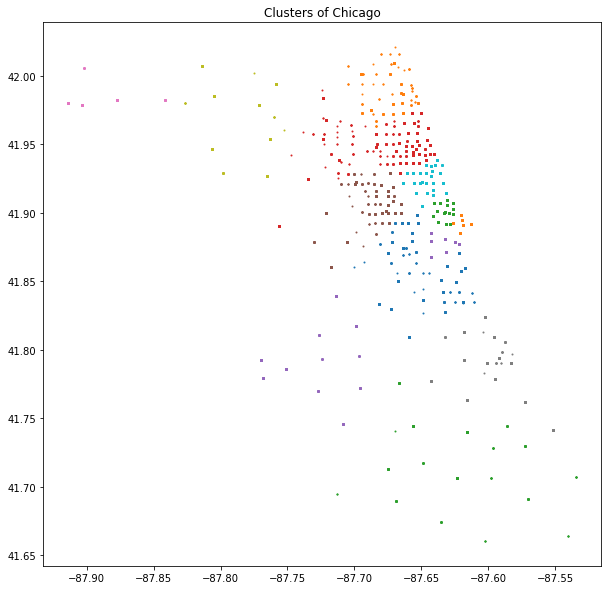

In [169]:
#clustering taxi rides based on pickups and dropoffs for each ride 
kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000)
plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2)

plt.title('Clusters of Chicago')
plt.show()



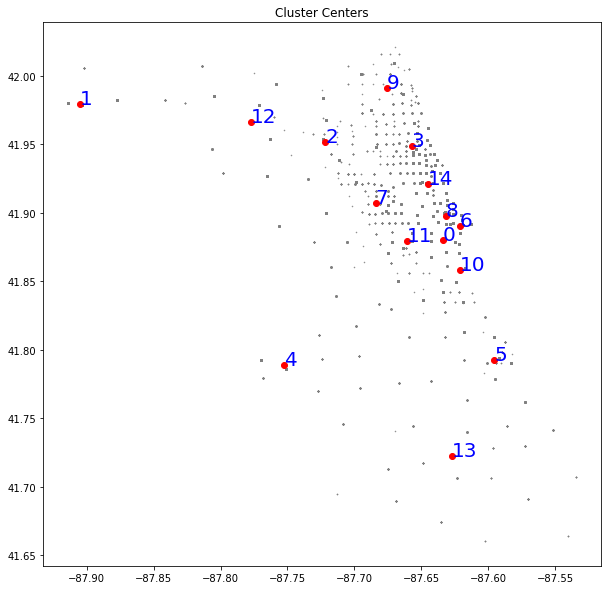

In [170]:
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df.label.unique():
    ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers')
plt.show()



In [171]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,PU_H3,DO_H3,PU_MONTH_NAME,PU_WEEKDAY_NAME,PU_YEAR,PU_MONTH,PU_WEEKDAY,PU_HOUR,PU_HOUR_OF_WEEK,PU_FOUR_HOURLY,DURATION_IN_MINUTES
10019694,0186acc0c8d50828e6dc5c9072ace58101e3e1b1,9a38858dc2ace73a20f89a976154131a733daf1f11e8d6...,2017-05-20 23:45:00,2017-05-20 23:45:00,360.0,1.30,1.703106e+10,1.703107e+10,6.0,7.0,6.75,0.0,0.0,1.5,8.25,Cash,Dispatch Taxi Affiliation,41.936237,-87.656412,POINT (-87.6564115308 41.9362371791),41.921855,-87.646211,POINT (-87.6462109769 41.9218549112),872c2118bffffff,872c2118affffff,May,Saturday,2017,5,5,24,144,5/5,6.00
7792802,7d0830d9dbbd03a9e1b5d1d99cd41d99d7b8fb90,b4d59da1d7b8c002094752251906d9a3bcc6c7ea71a15f...,2017-04-21 22:15:00,2017-04-21 22:15:00,300.0,0.40,1.703108e+10,1.703108e+10,8.0,8.0,5.00,0.0,0.0,1.0,6.00,Cash,Dispatch Taxi Affiliation,41.909496,-87.630964,POINT (-87.630963601 41.9094956686),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),872c2119dffffff,872c2119dffffff,April,Friday,2017,4,4,23,119,5/5,5.00
7493958,171ea5e4956fe55a58f9ec3be65238af8b79c4c2,38c32bfda2f77c2a57f33a9e3fcf7edb8e996f59bc2254...,2017-04-18 10:30:00,2017-04-18 10:45:00,379.0,1.00,1.703184e+10,1.703128e+10,32.0,28.0,6.25,2.0,NaN,0.0,8.25,Credit Card,Flash Cab,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),872c21191ffffff,872c2119cffffff,April,Tuesday,2017,4,1,11,35,3/5,6.32
5984763,a6da0037deae54685ba3a1a559ae6a33b9028bd9,e2c349c7cbb608d552aa0b5814031943f13641ef9e50d8...,2017-03-28 16:15:00,2017-03-28 16:15:00,317.0,0.96,1.703108e+10,1.703108e+10,8.0,8.0,5.75,0.0,0.0,2.0,7.75,Cash,Nova Taxi Affiliation Llc,41.891972,-87.612945,POINT (-87.6129454143 41.8919715078),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),872c2119cffffff,872c2119cffffff,March,Tuesday,2017,3,1,17,41,4/5,5.28
4498023,58bc23a32b790e568d3c50bc38e5dd473cbc9fcf,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,2017-03-09 14:30:00,2017-03-09 14:30:00,360.0,1.00,1.703128e+10,1.703184e+10,28.0,32.0,6.25,2.0,0.0,0.0,8.25,Credit Card,Northwest Management LLC,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),872c2119cffffff,872c21191ffffff,March,Thursday,2017,3,3,15,87,3/5,6.00


In [174]:
df_sam = sampleFile(20,df)

In [175]:
df_sam.index

Int64Index([ 3609117,  5693746, 10085650,  2366832,  2920991,  9032601,
            11254464, 11098381,  4279380, 19465460,
            ...
             5961431,  4038411, 14679156,  9740396,  9745959,   324621,
            15505834,   129561, 17742001,   249915],
           dtype='int64', length=865730)

In [185]:
km = KMeans(n_clusters=8)
km.fit(features)
#km.predict(cityData)
#labels = km.labels_
#cityData['Cluster'] = labels

KeyboardInterrupt: 

In [178]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,PU_H3,DO_H3,PU_MONTH_NAME,PU_WEEKDAY_NAME,PU_YEAR,PU_MONTH,PU_WEEKDAY,PU_HOUR,PU_HOUR_OF_WEEK,PU_FOUR_HOURLY,DURATION_IN_MINUTES
10019694,0186acc0c8d50828e6dc5c9072ace58101e3e1b1,9a38858dc2ace73a20f89a976154131a733daf1f11e8d6...,2017-05-20 23:45:00,2017-05-20 23:45:00,360.0,1.30,1.703106e+10,1.703107e+10,6.0,7.0,6.75,0.0,0.0,1.5,8.25,Cash,Dispatch Taxi Affiliation,41.936237,-87.656412,POINT (-87.6564115308 41.9362371791),41.921855,-87.646211,POINT (-87.6462109769 41.9218549112),872c2118bffffff,872c2118affffff,May,Saturday,2017,5,5,24,144,5/5,6.00
7792802,7d0830d9dbbd03a9e1b5d1d99cd41d99d7b8fb90,b4d59da1d7b8c002094752251906d9a3bcc6c7ea71a15f...,2017-04-21 22:15:00,2017-04-21 22:15:00,300.0,0.40,1.703108e+10,1.703108e+10,8.0,8.0,5.00,0.0,0.0,1.0,6.00,Cash,Dispatch Taxi Affiliation,41.909496,-87.630964,POINT (-87.630963601 41.9094956686),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),872c2119dffffff,872c2119dffffff,April,Friday,2017,4,4,23,119,5/5,5.00
7493958,171ea5e4956fe55a58f9ec3be65238af8b79c4c2,38c32bfda2f77c2a57f33a9e3fcf7edb8e996f59bc2254...,2017-04-18 10:30:00,2017-04-18 10:45:00,379.0,1.00,1.703184e+10,1.703128e+10,32.0,28.0,6.25,2.0,NaN,0.0,8.25,Credit Card,Flash Cab,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),872c21191ffffff,872c2119cffffff,April,Tuesday,2017,4,1,11,35,3/5,6.32
5984763,a6da0037deae54685ba3a1a559ae6a33b9028bd9,e2c349c7cbb608d552aa0b5814031943f13641ef9e50d8...,2017-03-28 16:15:00,2017-03-28 16:15:00,317.0,0.96,1.703108e+10,1.703108e+10,8.0,8.0,5.75,0.0,0.0,2.0,7.75,Cash,Nova Taxi Affiliation Llc,41.891972,-87.612945,POINT (-87.6129454143 41.8919715078),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),872c2119cffffff,872c2119cffffff,March,Tuesday,2017,3,1,17,41,4/5,5.28
4498023,58bc23a32b790e568d3c50bc38e5dd473cbc9fcf,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,2017-03-09 14:30:00,2017-03-09 14:30:00,360.0,1.00,1.703128e+10,1.703184e+10,28.0,32.0,6.25,2.0,0.0,0.0,8.25,Credit Card,Northwest Management LLC,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),872c2119cffffff,872c21191ffffff,March,Thursday,2017,3,3,15,87,3/5,6.00


In [184]:
features = pd.DataFrame()
features['duration_in_minutes']= df['DURATION_IN_MINUTES']
#features['Company']  = df['Company']
features['HOUR'] = df['PU_HOUR']

In [182]:
features

,duration_in_minutes,Company,HOUR
10019694,6.00,Dispatch Taxi Affiliation,24
7792802,5.00,Dispatch Taxi Affiliation,23
7493958,6.32,Flash Cab,11
5984763,5.28,Nova Taxi Affiliation Llc,17
4498023,6.00,Northwest Management LLC,15
...,...,...,...
22209691,7.00,Globe Taxi,22
1557193,12.38,Nova Taxi Affiliation Llc,17
5281251,9.00,City Service,24
13237511,6.18,Yellow Cab,16
